In [33]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [34]:
cities= "Resources/all_cities_years.csv"
weather = "Resources/top_cities_average_weather.csv"

In [35]:
cities_df = pd.read_csv(cities)
cities_df

,Unnamed: 0,Destination City,January,February,March,April,May,June,July,August,September,October,November,December
0,5,"Amsterdam, Netherlands (2013)",89425.0,73576.0,104179.0,124295.0,155463.0,161462.0,148674.0,165006.0,146622.0,127654.0,96116.0,106061.0
1,16,"Amsterdam, Netherlands (2014)",92024.0,75205.0,103942.0,110880.0,142314.0,148705.0,132277.0,154280.0,150822.0,132861.0,100080.0,106302.0
2,27,"Amsterdam, Netherlands (2015)",92506.0,73814.0,102489.0,131397.0,158984.0,163851.0,148313.0,168319.0,161552.0,143006.0,94755.0,101573.0
3,38,"Amsterdam, Netherlands (2016)",90014.0,75229.0,110462.0,144508.0,161621.0,161598.0,147317.0,159403.0,152280.0,137474.0,98660.0,110715.0
4,49,"Amsterdam, Netherlands (2017)",93557.0,80137.0,118879.0,153882.0,177235.0,175705.0,159835.0,177119.0,168446.0,144774.0,110022.0,118295.0
5,0,"Cancun, Mexico (2013)",243338.0,260307.0,335126.0,257706.0,262654.0,275327.0,273851.0,235885.0,144330.0,175130.0,217408.0,273329.0
6,11,"Cancun, Mexico (2014)",271477.0,285503.0,356042.0,291932.0,290454.0,305770.0,322587.0,259315.0,157438.0,209693.0,259984.0,319556.0
7,22,"Cancun, Mexico (2015)",316600.0,323530.0,386224.0,345307.0,336096.0,363733.0,382935.0,320904.0,194409.0,243101.0,290648.0,368312.0
8,33,"Cancun, Mexico (2016)",339521.0,348946.0,442569.0,362755.0,345835.0,390589.0,418707.0,321024.0,205865.0,256341.0,299700.0,404399.0
9,44,"Cancun, Mexico (2017)",374970.0,376361.0,454131.0,412359.0,395394.0,441211.0,464742.0,358087.0,213731.0,258558.0,325195.0,438478.0


In [144]:
weather_df = pd.read_csv(weather)
weather_index = weather_df.set_index("City")
weather_transposed = weather_index.T


City,Cancun,London,Tokyo,Toronto,Mexico City,Amsterdam,Paris,Punta Cana,Vancouver,San Jose del Cabo,Montego Bay
January,75.4,44.2,41.4,25.3,58.3,38.1,40.8,76.6,39.4,66.0,77.2
February,76.6,44.2,42.3,27.3,60.6,38.3,42.1,76.5,40.8,66.6,77.0
March,78.4,47.8,47.7,34.5,64.6,43.0,47.8,77.0,44.4,68.2,78.2
April,81.3,53.6,57.0,46.2,67.3,48.4,52.7,77.9,48.9,71.4,79.3
May,83.7,58.6,64.8,57.4,68.0,55.2,59.4,79.5,55.0,75.2,80.9
June,84.6,64.9,70.5,66.9,66.9,69.7,64.9,81.0,60.3,79.7,82.0
July,85.1,67.3,77.0,72.1,64.8,63.7,68.9,81.5,64.4,83.3,82.5
August,85.5,66.9,79.5,70.7,64.9,63.5,68.5,81.9,64.4,84.0,82.6
September,84.0,63.1,73.0,63.0,64.4,58.5,62.4,81.7,58.8,82.8,82.2
October,81.5,56.3,63.5,51.3,62.8,51.8,55.4,80.6,50.5,79.2,81.3


In [129]:
cities_rename = cities_df.rename(columns={"Destination City":" "})

cities_transp = cities_rename.set_index(" ").T
cities_reset = cities_transp.reset_index()

,index,"Amsterdam, Netherlands (2013)","Amsterdam, Netherlands (2014)","Amsterdam, Netherlands (2015)","Amsterdam, Netherlands (2016)","Amsterdam, Netherlands (2017)","Cancun, Mexico (2013)","Cancun, Mexico (2014)","Cancun, Mexico (2015)","Cancun, Mexico (2016)",...,"Toronto, Canada (2013)","Toronto, Canada (2014)","Toronto, Canada (2015)","Toronto, Canada (2016)","Toronto, Canada (2017)","Vancouver, Canada (2013)","Vancouver, Canada (2014)","Vancouver, Canada (2015)","Vancouver, Canada (2016)","Vancouver, Canada (2017)"
0,January,89425.0,92024.0,92506.0,90014.0,93557.0,243338.0,271477.0,316600.0,339521.0,...,129769.0,111440.0,114040.0,112824.0,116636.0,73993.0,79748.0,87500.0,84542.0,77240.0
1,February,73576.0,75205.0,73814.0,75229.0,80137.0,260307.0,285503.0,323530.0,348946.0,...,114373.0,110806.0,109174.0,113504.0,105329.0,69637.0,77194.0,79259.0,84384.0,71863.0
2,March,104179.0,103942.0,102489.0,110462.0,118879.0,335126.0,356042.0,386224.0,442569.0,...,145755.0,141780.0,135736.0,129763.0,133350.0,80763.0,92039.0,95907.0,96750.0,93083.0
3,April,124295.0,110880.0,131397.0,144508.0,153882.0,257706.0,291932.0,345307.0,362755.0,...,135732.0,135353.0,131468.0,125369.0,133094.0,76596.0,84624.0,88984.0,90753.0,84449.0
4,May,155463.0,142314.0,158984.0,161621.0,177235.0,262654.0,290454.0,336096.0,345835.0,...,147946.0,150955.0,145960.0,141088.0,148327.0,99378.0,107407.0,115904.0,119813.0,120299.0
5,June,161462.0,148705.0,163851.0,161598.0,175705.0,275327.0,305770.0,363733.0,390589.0,...,141979.0,148785.0,138528.0,139626.0,147156.0,120500.0,130653.0,131054.0,130399.0,136038.0
6,July,148674.0,132277.0,148313.0,147317.0,159835.0,273851.0,322587.0,382935.0,418707.0,...,150384.0,152675.0,148167.0,149192.0,142842.0,134594.0,142649.0,143566.0,141990.0,147976.0
7,August,165006.0,154280.0,168319.0,159403.0,177119.0,235885.0,259315.0,320904.0,321024.0,...,168596.0,159494.0,157259.0,153925.0,152768.0,137460.0,147179.0,144347.0,136952.0,145976.0
8,September,146622.0,150822.0,161552.0,152280.0,168446.0,144330.0,157438.0,194409.0,205865.0,...,139784.0,144728.0,145360.0,147355.0,142233.0,97358.0,101825.0,106747.0,106974.0,107338.0
9,October,127654.0,132861.0,143006.0,137474.0,144774.0,175130.0,209693.0,243101.0,256341.0,...,139160.0,139885.0,142723.0,142414.0,152136.0,76110.0,87227.0,88646.0,84202.0,91541.0


In [149]:
x_axis = cities_reset['index']


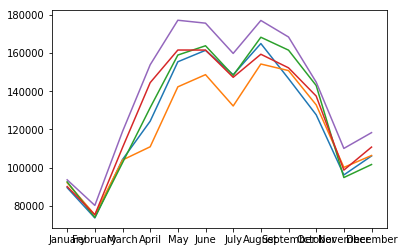

In [150]:
# Amsterdam plot a line graph with passenger for the past 5 years plus weather
ams_2013 = cities_reset['Amsterdam, Netherlands (2013)']
ams_2014 = cities_reset['Amsterdam, Netherlands (2014)']
ams_2015 = cities_reset['Amsterdam, Netherlands (2015)']
ams_2016 = cities_reset['Amsterdam, Netherlands (2016)']
ams_2017 = cities_reset['Amsterdam, Netherlands (2017)']
ams_weather = weather_transposed['Amsterdam']

plt.plot(x_axis,ams_2013)
plt.plot(x_axis,ams_2014)
plt.plot(x_axis,ams_2015)
plt.plot(x_axis,ams_2016)
plt.plot(x_axis,ams_2017)

plt.show()


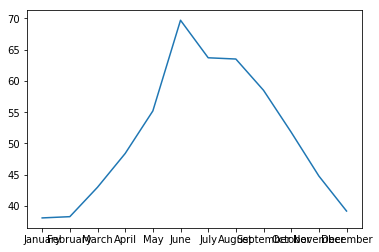

In [151]:
plt.plot(x_axis,ams_weather)